In [4]:
import networkx as nx
from search import *
import heapq

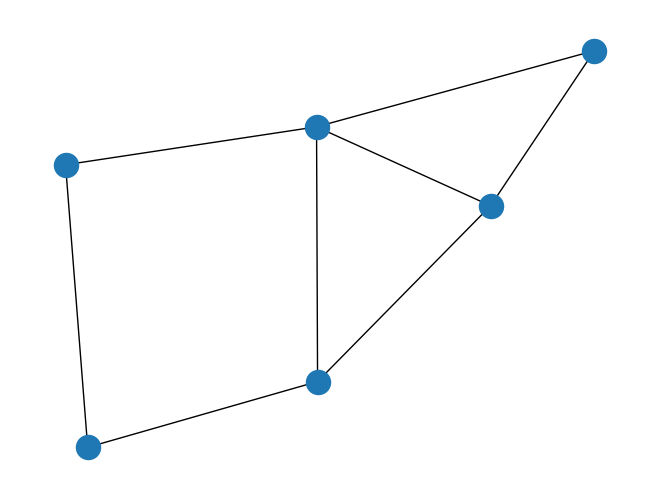

In [3]:
graph = nx.Graph()
graph.add_edge('S', 'A', length=2, traveled=True)
graph.add_edge('A', 'B', length=1, traveled=True)
graph.add_edge('S', 'E', length=1, traveled=True)
graph.add_edge('B', 'E', length=2, traveled=False)
graph.add_edge('S', 'C', length=2, traveled=False)
graph.add_edge('C', 'D', length=3, traveled=False)
graph.add_edge('D', 'E', length=1, traveled=False)
graph.add_edge('C', 'E', length=2.5, traveled=False)
nx.draw(graph)

In [ ]:
# Greatest Cost First Search! 
# It's like LCFS, but we use the min heap with negated numbers to make it a max heap.

class GCFSFrontier(Frontier):
    """Implements a frontier container appropriate for depth-first
    search."""

    def __init__(self):
        """The constructor takes no argument. It initialises the
        container to an empty stack."""
        self.container = []
        self.counter = 0

    def add(self, path: list[Arc]):
        cost = sum([arc.cost for arc in path])
        heapq.heappush(self.container, (-cost, self.counter, path))
        self.counter += 1

    def __iter__(self):
        """The object returns itself because it is implementing a __next__
        method and does not need any additional state for iteration."""
        return self
        
    def __next__(self):
        if len(self.container) > 0:
            return heapq.heappop(self.container)[2]
        else:
            raise StopIteration
